In [1]:
import pandas as pd
import scipy.sparse
import scipy
import numpy as np
from sklearn.decomposition import PCA
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.manifold import TSNE

In [2]:
# def getpath(relative_path):
#     from os import path
#     my_path = path.abspath(path.dirname(__file__))
#     return path.join(my_path, relative_path)


# train_clean_path = getpath('../Data/train_clean.tsv')
# sparse_matrix_path = getpath('../Data/train_term_matrix.dtx')

train_clean = pd.read_csv('Data/train_clean.tsv', sep='\t', header=0)

sparse_matrix = pd.read_csv('Data/train_term_matrix.dtx', header=None, 
                            skiprows = 1, delimiter=r"\s+")



In [3]:
#seperate out the rows, columns, entries information
format_sparse = (sparse_matrix[:1])
total_rows = format_sparse.iloc[0][0]
total_columns = format_sparse.iloc[0][1]
total_entries = format_sparse.iloc[0][2]

In [4]:
#drop the first row with the rows, columns, entries information
sparse_matrix.drop(sparse_matrix.index[0], inplace=True)

In [5]:
# subtract 1 from the indices because I am translating from R to Python indexing. R start at 1 Python starts at 0
sparse_rows = sparse_matrix.iloc[:,0].values - 1
sparse_columns = sparse_matrix.iloc[:,1].values - 1

In [6]:
# Values do not need to be changed at all
sparse_values = sparse_matrix.iloc[:,2].values

In [7]:
# create the sparse matrix
sparse_matrix = scipy.sparse.csr_matrix( (sparse_values,
                                          (sparse_rows,sparse_columns)), 
                                            shape=(total_rows, total_columns) )


In [8]:
%%time

# TDIF
tf_idf = TfidfTransformer()

sparse_matrix_tf_idf = tf_idf.fit_transform(sparse_matrix)

samples = 10000
state = 95

# Sample Data to reduce the size
sparse_matrix_sample = resample(sparse_matrix_tf_idf, 
                                n_samples=samples, random_state=state)



CPU times: user 998 ms, sys: 384 ms, total: 1.38 s
Wall time: 1.39 s


In [9]:
train_clean['price'] = train_clean['price'].astype(float)
print(train_clean.head())


   train_id                                 name  item_condition_id  \
0         0  MLB Cincinnati Reds T Shirt Size XL                  3   
1         1     Razer BlackWidow Chroma Keyboard                  3   
2         2                       AVA-VIV Blouse                  1   
3         3                Leather Horse Statues                  1   
4         4                 24K GOLD plated rose                  1   

                                       category_name brand_name  price  \
0                                  Men/Tops/T-shirts        NaN   10.0   
1  Electronics/Computers & Tablets/Components & P...      Razer   52.0   
2                        Women/Tops & Blouses/Blouse     Target   10.0   
3                 Home/Home Décor/Home Décor Accents        NaN   35.0   
4                            Women/Jewelry/Necklaces        NaN   44.0   

   shipping                                   item_description  \
0         1                                                NaN

In [10]:
mean_values = train_clean.groupby('category_name_1')['price'].mean()
std_values = train_clean.groupby('category_name_1')['price'].std()
count_values = train_clean.groupby('category_name_1')['price'].count()


summary_category = pd.concat([mean_values, std_values, count_values], axis=1)
summary_category.columns = ['Mean Price', 'St Dev Price', "Listings Count"]

print(round(summary_category , 2))

                        Mean Price  St Dev Price  Listings Count
category_name_1                                                 
Beauty                       19.67         21.36          207828
Electronics                  35.17         65.42          122690
Handmade                     18.16         27.76           30842
Home                         24.54         24.42           67871
Kids                         20.64         22.73          171689
Men                          34.71         41.24           93680
Other                        20.81         29.85           45351
Sports & Outdoors            25.53         29.30           25342
Vintage & Collectibles       27.34         53.51           46530
Women                        28.89         39.44          664385


note: removed outliers


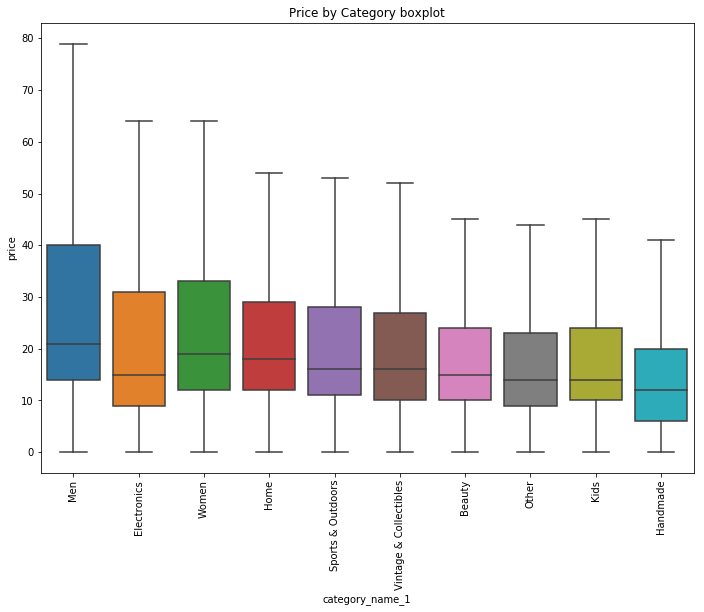

In [36]:
import seaborn as sns
print("note: removed outliers")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title("Price by Category boxplot")
plt.xticks(rotation=90)
ax = sns.boxplot(x='category_name_1', y='price', data=train_clean, showfliers=False)

In [ ]:
train_clean['price_bin'] = pd.cut(df['price'], bins = 4)

In [11]:
%%time

# Fit PCA with top 2 components on a subset of the data
pca = PCA(n_components=2)

descriptions_pca = pca.fit(sparse_matrix_sample.todense())


CPU times: user 5min 2s, sys: 6min 28s, total: 11min 30s
Wall time: 6min 6s


In [12]:
%%time
descriptions_pca = pca.transform(sparse_matrix_sample.todense())

CPU times: user 25 s, sys: 52.9 s, total: 1min 17s
Wall time: 51 s


In [ ]:
%%time
descriptions_pca_all_data = pca.transform(sparse_matrix_tf_idf.todense())

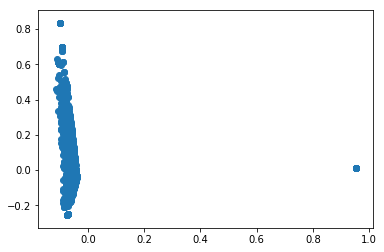

In [13]:
%matplotlib inline

plt.scatter(descriptions_pca[:,0], descriptions_pca[:,1])
plt.show()

In [ ]:
%%time
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
app_predict_tsne2d = tsne.fit_transform(sparse_matrix_sample.todense())

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 181.007s...
